<a href="https://colab.research.google.com/github/AmirGhnbr/technical_analysis_of_stocks/blob/main/technical_analysis_of_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance ta mplfinance plotly

In [ ]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4307    0  4307    0     0  12201      0 --:--:-- --:--:-- --:--:-- 12201
100  517k  100  517k    0     0   532k      0 --:--:-- --:--:-- --:--:-- 3051k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4267    0  4267    0     0  10997      0 --:--:-- --:--:-- --:--:-- 11025
100  392k  100  392k    0     0   403k      0 --:--:-- --:--:-- --:--:-- 1596k


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

sns.set_theme(context="talk", style="whitegrid",
              palette="colorblind", color_codes=True,
              rc={"figure.figsize": [12, 8]})

In [ ]:
import pandas as pd
import yfinance as yf
import talib

In [ ]:
import datetime
now = datetime.datetime.now()
data = yf.download('BTC-USD',
                   start='2022-01-01',
                   end = now,
                   progress= False,
                   auto_adjust=True)
data

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,27951569547
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,33071628362
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,42494677905
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,36851084859
...,...,...,...,...,...
2023-06-30,30441.353516,31256.863281,29600.275391,30477.251953,26387306197
2023-07-01,30471.847656,30641.289062,30328.865234,30590.078125,9086606733
2023-07-02,30587.269531,30766.140625,30264.019531,30620.769531,10533418042


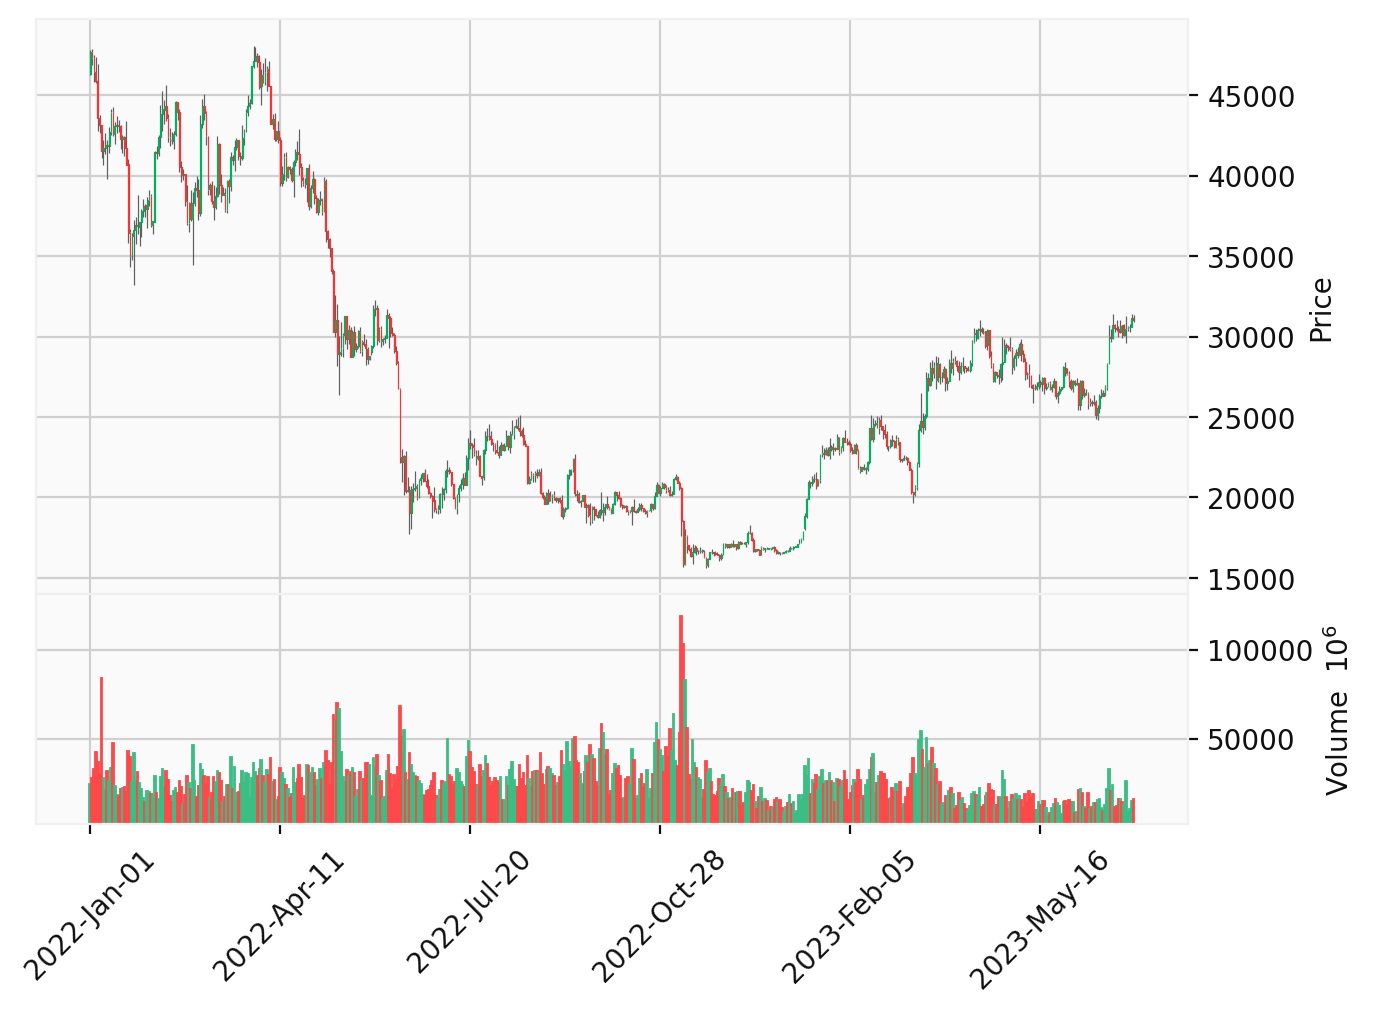

In [ ]:
import mplfinance as mpf
mpf.plot(data, type='candle',style='yahoo',volume=True)

## Turn the candles to heikin ashi and plot interactive plotly plot


In [ ]:
data['HA_Close'] = (data['Open'] + data['High'] + data['Low'] + data['Close']) / 4
data['HA_Open'] = (data['Open'].shift(1) + data['Close'].shift(1)) / 2
data['HA_High'] = data[['High', 'HA_Open', 'HA_Close']].max(axis=1)
data['HA_Low'] = data[['Low', 'HA_Open', 'HA_Close']].min(axis=1)


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

fig.show()


## Let's calculate the SMA

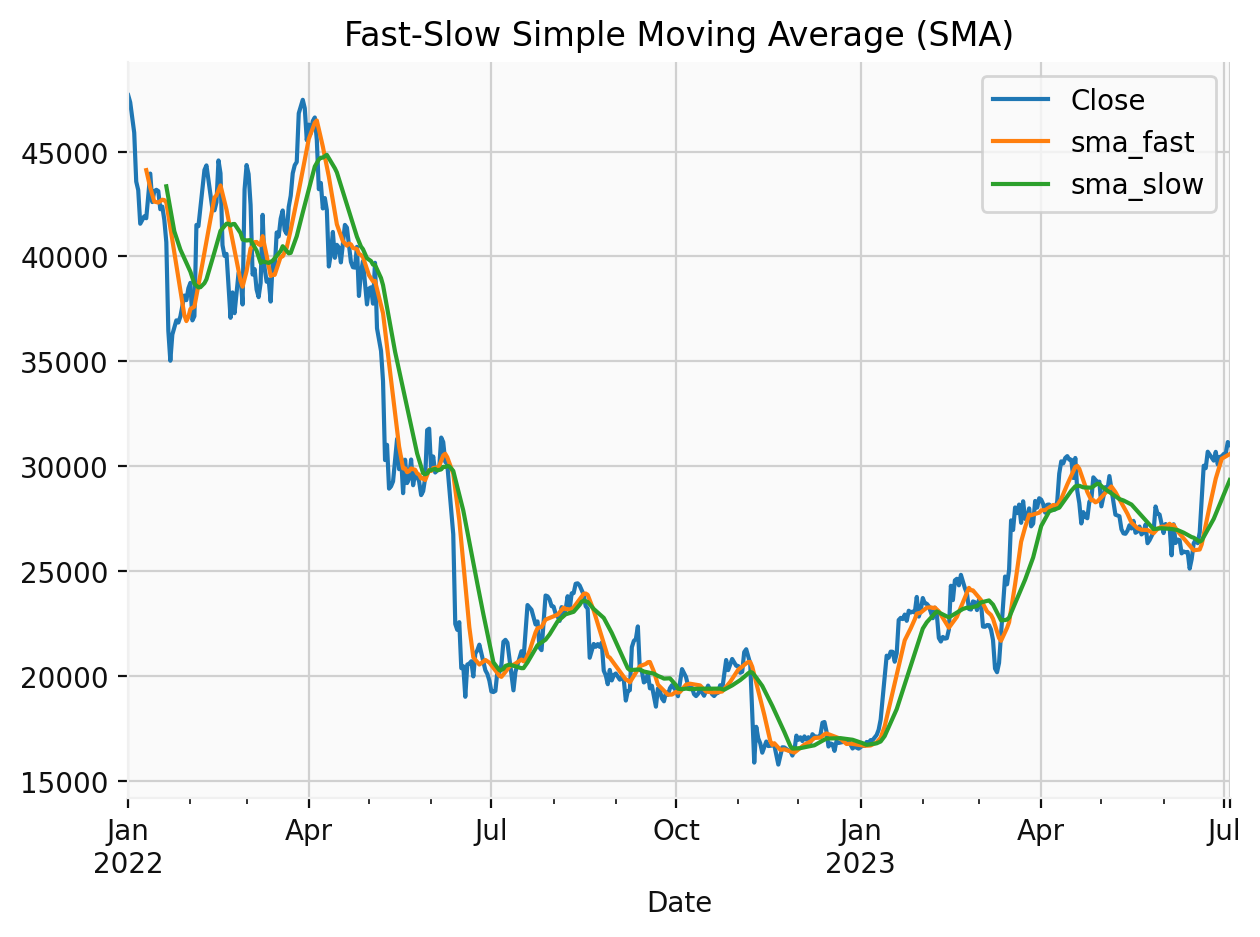

In [ ]:
data['sma_slow'] = talib.SMA(data['Close'], timeperiod=20)
data['sma_fast'] = talib.SMA(data['Close'], timeperiod=10)
(
    data[["Close", "sma_fast",'sma_slow']]
    .plot(title="Fast-Slow Simple Moving Average (SMA)")
)

sns.despine()
plt.tight_layout()